# **üìå Extracci√≥n(E - Extract)**

## **Importando datos de Telecom X**

In [172]:
import pandas as pd
import json

In [173]:
datos = 'https://drive.google.com/uc?id=1BDg6zUVXK6n-056GLQFfecA6rIM_BzGm'

In [174]:
df = pd.read_json(datos)

# **üîß Transformaci√≥n (T - Transform)**

## **Conocer el conjunto de datos**

In [175]:
df.head(5)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

## **Normalizar columnas tipo diccionario**

In [176]:
# Lista de columnas a normalizar
cols_to_normalize = ['customer', 'phone', 'internet', 'account']

In [177]:
# Crear una copia del dataframe original
df_norm = df.copy()

# Normalizar y expandir cada columna JSON en columnas individuales
for col in cols_to_normalize:
    df_norm = pd.concat([df_norm, pd.json_normalize(df_norm[col])], axis=1)
    df_norm.drop(columns=[col], inplace=True)

In [178]:
df_norm.head(5)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

## **Comprobaci√≥n de incoherencias en los datos**

En este paso, verifica si hay problemas en los datos que puedan afectar el an√°lisis. Presta atenci√≥n a valores ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Este proceso es esencial para asegurarte de que los datos est√©n listos para las siguientes etapas.

In [179]:
# Verificar los tipos de datos de 'df_norm'
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [180]:
# Verificar que no existan ID's duplicados
df_norm['customerID'].duplicated().sum()

np.int64(0)

In [181]:
# verificamos si todos los datos de la columna 'SeniorCitizen' son n√∫meros
pd.to_numeric(df_norm['SeniorCitizen'], errors='coerce').isna().sum()

np.int64(0)

In [182]:
# verificar si todos los datos de la columna 'Charges.Total' son n√∫meros
pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna().sum()

np.int64(11)

In [183]:
# mostar los datos que no son n√∫meros
df_norm[pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna()]

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Yes       0   
2308  3213-VVOLG    No    Male              0     Yes        Yes       0   
2930  4075-WKNIU    No  Female              0     Yes        Yes       0   
3134  4367-NUYAO    No    Male              0     Yes        Yes       0   
3203  4472-LVYGI    No  Female              0     Yes        Yes       0   
4169  5709-LVOEQ    No  Female              0     Yes        Yes       0   
5599  7644-OMVMY    No    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService  ...         OnlineBackup  \
975            No  No phone service             DSL  ...                  Yes   
1775          Yes                No              No  ...  No internet service   
1955          Yes               Yes             DSL  ...                  Yes   
2075          Yes                No              No  ...  No internet service   
2232          Yes                No              No  ...  No internet service   
2308          Yes               Yes              No  ...  No internet service   
2930          Yes               Yes             DSL  ...                  Yes   
3134          Yes               Yes              No  ...  No internet service   
3203           No  No phone service             DSL  ...                   No   
4169          Yes                No             DSL  ...                  Yes   
5599          Yes                No              No  ...  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
975                   Yes                  Yes                  Yes   
1775  No internet service  No internet service  No internet service   
1955                   No                  Yes                   No   
2075  No internet service  No internet service  No internet service   
2232  No internet service  No internet service  No internet service   
2308  No internet service  No internet service  No internet service   
2930                  Yes                  Yes                  Yes   
3134  No internet service  No internet service  No internet service   
3203                  Yes                  Yes                  Yes   
4169                  Yes                   No                  Yes   
5599  No internet service  No internet service  No internet service   

          StreamingMovies  Contract PaperlessBilling  \
975                    No  Two year               No   
1775  No internet service  Two year               No   
1955                   No  Two year              Yes   
2075  No internet service  One year              Yes   
2232  No internet service  Two year               No   
2308  No internet service  Two year               No   
2930                   No  Two year               No   
3134  No internet service  Two year               No   
3203                   No  Two year              Yes   
4169                  Yes  Two year               No   
5599  No internet service  Two year               No   

                  PaymentMethod Charges.Monthly  Charges.Total  
975     Credit card (automatic)           56.05                 
1775               Mailed check           20.00                 
1955  Bank transfer (automatic)           61.90                 
2075               Mailed check           19.70                 
2232               Mailed check           20.25                 
2308               Mailed check           25.35                 
2930               Mailed check           73.35                 
3134               Mailed check           25.75                 
3203  Ban

## **Manejo de inconsistencias**

In [184]:
# Vamos a converir la columna 'SeniorCitizen' a tipo de dato 'bool'
df_norm['SeniorCitizen'] = df_norm['SeniorCitizen'].astype('bool')

In [185]:
# A los campos vacios de 'Charges.Total' agregar un 0
df_norm['Charges.Total'] = pd.to_numeric(df_norm['Charges.Total'], errors='coerce').fillna(0)

In [186]:
pd.to_numeric(df_norm['Charges.Total'], errors='coerce').isna().sum()

np.int64(0)

In [187]:
# Convertir 'Charges.Total' a tipo de dato float64
df_norm['Charges.Total'] = df_norm['Charges.Total'].astype('float64')

## **Vamos a conservar solo las columnas que**:
- Pueden influir en la decisi√≥n de cancelar de los clientes.
- No son redundantes ni irrelevantes para el modelo de an√°lisis.

In [188]:
# eliminamos la columna 'customerID'
df_norm = df_norm.drop(columns=['customerID'])

In [189]:
df_norm.head(5)

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female          False     Yes        Yes       9          Yes   
1    No    Male          False      No         No       9          Yes   
2   Yes    Male          False      No         No       4          Yes   
3   Yes    Male           True     Yes         No      13          Yes   
4   Yes  Female           True     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod  Charges.Monthly  Charges.Total  
0      Mailed check             65.6         593.30  
1      Mailed check             59.9         542.40  
2  Electronic check             73.9         280.85  
3  Electronic check             98.0        1237.85  
4      Mailed check             83.9         267.40

## **Columna de cuentas diarias**

Ahora que los datos est√°n limpios, es momento de crear la columna **"Cuentas_Diarias"**. Utiliza la facturaci√≥n mensual para calcular el valor diario, proporcionando una visi√≥n m√°s detallada del comportamiento de los clientes a lo largo del tiempo.

Para crear la columna DailyCharges (Cuentas Diarias), solo necesitamos dividir el valor mensual (Charges.Monthly) entre aproximadamente 30 d√≠as. Esto nos da una estimaci√≥n diaria del gasto del cliente.

In [190]:
# Crear la columna DailyCharges dividiendo el monto mensual por 30
df_norm['DailyCharges'] = df_norm['Charges.Monthly'] / 30

In [191]:
df_norm['DailyCharges'].head(3)

0    2.186667
1    1.996667
2    2.463333
Name: DailyCharges, dtype: float64

## **Estandarizaci√≥n y transformaci√≥n de datos**

Vamos a convertir las columnas que contienen "Yes" / "No" a valores booleanos tipo entero (1 / 0)

In [192]:
# Lista de columnas a convertir
yes_no_cols = [
    'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

In [193]:
# Convertir 'Yes' a 1 y 'No' a 0
for col in yes_no_cols:
    df_norm[col] = df_norm[col].apply(lambda x: 1 if x == 'Yes' else 0).astype('bool')

In [194]:
df_norm.sample(5)

Churn  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
622   False    Male          False    False       False      62          True   
3558   True    Male          False    False       False      11         False   
3681  False  Female          False     True        True      50          True   
6510  False    Male          False     True        True      63          True   
4656  False    Male           True     True        True      72          True   

      MultipleLines InternetService  OnlineSecurity  ...  DeviceProtection  \
622            True             DSL            True  ...              True   
3558          False             DSL           False  ...              True   
3681           True             DSL            True  ...              True   
6510           True              No           False  ...             False   
4656          False     Fiber optic            True  ...              True   

      TechSupport  StreamingTV  StreamingMovies  Contract PaperlessBilling  \
622          True        False            False  Two year            False   
3558        False         True            False  One year             True   
3681         True        False             True  One year             True   
6510        False        False            False  Two year            False   
4656         True         True             True  Two year             True   

                  PaymentMethod Charges.Monthly  Charges.Total  DailyCharges  
622   Bank transfer (automatic)           69.40        4237.50      2.313333  
3558           Electronic check           41.60         470.60      1.386667  
3681  Bank transfer (automatic)           80.05        4042.20      2.668333  
6510               Mailed check           25.25        1573.05      0.841667  
4656    Credit card (automatic)          104.10        7447.70      3.470000  

[5 rows x 21 columns]

## **Traducir datos del dataframe**

In [195]:
cols = df_norm.columns
cols

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'DailyCharges'],
      dtype='object')

In [196]:
# Traducir a espanol los encabezados de las columnas
df_norm.rename(columns={
    'Churn': 'Evasi√≥n',
    'gender': 'G√©nero',
    'SeniorCitizen': 'Adulto Mayor',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Dependiente',
    'tenure': 'Permanencia',
    'PhoneService': 'Servicio Telef√≥nico',
    'MultipleLines': 'L√≠neas M√∫ltiples',
    'InternetService': 'Servicio Internet',
    'OnlineSecurity': 'Seguridad en L√≠nea',
    'OnlineBackup': 'Respaldo en Linea',
    'DeviceProtection': 'Protecci√≥n Dispositivo',
    'TechSupport': 'Soporte T√©cnico',
    'StreamingTV': 'Streaming de TV',
    'StreamingMovies': 'Streaming de Pel√≠culas',
    'Contract': 'Tipo Contrato',
    'PaperlessBilling': 'Facturaci√≥n Electronica',
    'PaymentMethod': 'M√©todo de Pago',
    'Charges.Monthly': 'Cargo Mensual',
    'Charges.Total': 'Cargo Total',
    'DailyCharges': 'Cargo Diario'
}, inplace=True)


In [197]:
df_norm.columns

Index(['Evasi√≥n', 'G√©nero', 'Adulto Mayor', 'Tiene Pareja', 'Dependiente',
       'Permanencia', 'Servicio Telef√≥nico', 'L√≠neas M√∫ltiples',
       'Servicio Internet', 'Seguridad en L√≠nea', 'Respaldo en Linea',
       'Protecci√≥n Dispositivo', 'Soporte T√©cnico', 'Streaming de TV',
       'Streaming de Pel√≠culas', 'Tipo Contrato', 'Facturaci√≥n Electronica',
       'M√©todo de Pago', 'Cargo Mensual', 'Cargo Total', 'Cargo Diario'],
      dtype='object')

In [198]:
# Extraer los valores unicos de la columna `Genero`
df_norm['G√©nero'].unique()

array(['Female', 'Male'], dtype=object)

In [199]:
# Cambiar 'Female' por 'Femenino' y 'Male' por 'Masculino'
df_norm['G√©nero'] = df_norm['G√©nero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})

In [200]:
df_norm['G√©nero'].unique()

array(['Femenino', 'Masculino'], dtype=object)

In [201]:
# Extraer los valores unicos de la columna 'TipoContrato'
df_norm['Tipo Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [202]:
# Traducir los campos de 'TipoContrato'
df_norm['Tipo Contrato'] = df_norm['Tipo Contrato'].replace({'Month-to-month': 'Mes-a-Mes', 'One year': 'Un a√±o', 'Two year': 'Dos a√±os'})

In [203]:
# Extraer los valores unicos de la columna 'MetodoPago'
df_norm['M√©todo de Pago'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [204]:
# Traducir los campos de 'MetodoPago'
df_norm['M√©todo de Pago'] = df_norm['M√©todo de Pago'].replace({
    'Electronic check': 'Cheque electr√≥nico',
    'Mailed check': 'Cheque por correo',
    'Bank transfer (automatic)': 'Transferencia',
    'Credit card (automatic)': 'Tarjeta de cr√©dito'
})

In [205]:
# Extraer los valores unicos de la columna 'ServicioInternet'
df_norm['Servicio Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [206]:
# Traducir los campos de 'ServicioInternet'
df_norm['Servicio Internet'] = df_norm['Servicio Internet'].replace({'Fiber optic': 'Fibra √≥ptica'})

In [207]:
# Generar nuevo archivo CSV del dataframe 'df_norm'
df_norm.to_csv('Datos_TelecomX.csv', index=False)

# **üìä Carga y an√°lisis(L - Load & Analysis)**

## **An√°lisis Descriptivo**

In [208]:
df_telecom = pd.read_csv('Datos_TelecomX.csv')

In [209]:
df_telecom.head(5)

Evasi√≥n     G√©nero  Adulto Mayor  Tiene Pareja  Dependiente  Permanencia  \
0    False   Femenino         False          True         True            9   
1    False  Masculino         False         False        False            9   
2     True  Masculino         False         False        False            4   
3     True  Masculino          True          True        False           13   
4     True   Femenino          True          True        False            3   

   Servicio Telef√≥nico  L√≠neas M√∫ltiples Servicio Internet  \
0                 True             False               DSL   
1                 True              True               DSL   
2                 True             False      Fibra √≥ptica   
3                 True             False      Fibra √≥ptica   
4                 True             False      Fibra √≥ptica   

   Seguridad en L√≠nea  ...  Protecci√≥n Dispositivo  Soporte T√©cnico  \
0               False  ...                   False             True   
1               False  ...                   False            False   
2               False  ...                    True            False   
3               False  ...                    True            False   
4               False  ...                   False             True   

   Streaming de TV  Streaming de Pel√≠culas  Tipo Contrato  \
0             True                   False         Un a√±o   
1            False                    True      Mes-a-Mes   
2            False                   False      Mes-a-Mes   
3             True                    True      Mes-a-Mes   
4             True                   False      Mes-a-Mes   

  Facturaci√≥n Electronica      M√©todo de Pago Cargo Mensual  Cargo Total  \
0                    True   Cheque por correo          65.6       593.30   
1                   False   Cheque por correo          59.9       542.40   
2                    True  Cheque electr√≥nico          73.9       280.85   
3                    True  Cheque electr√≥nico          98.0      1237.85   
4                    True   Cheque por correo          83.9       267.40   

   Cargo Diario  
0      2.186667  
1      1.996667  
2      2.463333  
3      3.266667  
4      2.796667  

[5 rows x 21 columns]

In [210]:
df_telecom.describe()

Permanencia  Cargo Mensual  Cargo Total  Cargo Diario
count  7267.000000    7267.000000  7267.000000   7267.000000
mean     32.346498      64.720098  2277.182035      2.157337
std      24.571773      30.129572  2268.648587      1.004319
min       0.000000      18.250000     0.000000      0.608333
25%       9.000000      35.425000   396.200000      1.180833
50%      29.000000      70.300000  1389.200000      2.343333
75%      55.000000      89.875000  3778.525000      2.995833
max      72.000000     118.750000  8684.800000      3.958333

## **An√°lisis por variable**

### **üîπ Antig√ºedad en meses:**

- Hay clientes con antig√ºedad = 0, es decir que podr√≠an estar reci√©n registrados, lo que explicar√≠a valores bajos en facturaci√≥n.
- La antig√ºedad promedio (`~32` meses) sugiere que muchos clientes tienen una relaci√≥n prolongada.
- Distribuci√≥n posiblemente sesgada hacia los extremos (clientes nuevos y antiguos).

**Sugerencia:** crear grupos de antig√ºedad (ej. nuevos: `0‚Äì12`, leales: `>48`) para analizar la `Evasion`.

### **üîπ Cargo mensual**

- Var√≠a bastante (de `~$18` a `~$118`), probablemente seg√∫n servicios contratados.
- La mediana es mayor que la media, lo que indica una ligera asimetr√≠a hacia la izquierda (clientes con cargos bajos).

üí° Clientes con cargos m√°s altos podr√≠an ser m√°s exigentes ‚Üí mayor `Evasion`.

### **üîπ Gasto diario estimado**

- Directamente proporcional a `Cargo Mensual`.
- Menos dispersi√≥n (`std ‚âà 1.0`), pero a√∫n muestra variabilidad en consumo diario.

üí° √ötil para normalizar ingresos y comparar clientes independientemente de su antig√ºedad.

## **Distribuci√≥n de evasi√≥n**

### **üìä Visualizaci√≥n de la distribuci√≥n de `Evasi√≥n`**

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Estilo general
sns.set(style='whitegrid')

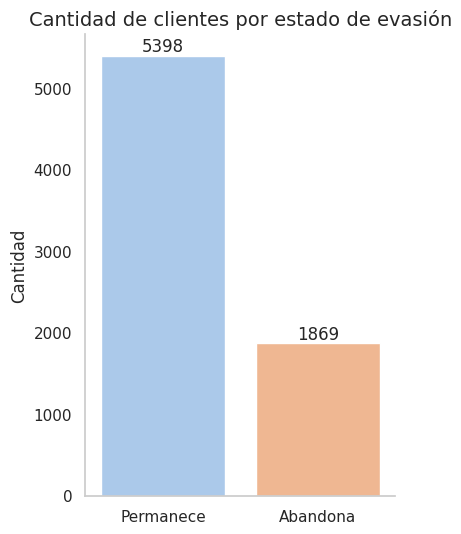

In [213]:
# Gr√°fico de barras
plt.figure(figsize=(4, 6))
sns.countplot(data=df_telecom, x='Evasi√≥n', hue='Evasi√≥n', palette='pastel', legend=False)
plt.title('Cantidad de clientes por estado de evasi√≥n', fontsize=14)
plt.ylabel('Cantidad')
plt.xlabel('')
plt.xticks([0, 1], ['Permanece', 'Abandona'])
# Eliminar borde superior y el de la derecha
sns.despine(top=True, right=True)
plt.grid(False)
for i, j in enumerate(df_telecom['Evasi√≥n'].value_counts()):
    plt.text(i, j, str(j), ha='center', va='bottom')
plt.savefig('dist_evasion.png', dpi=300, bbox_inches='tight')
plt.show()

In [214]:
# Conteo total de Evasi√≥n
conteo_evasion = df_telecom['Evasi√≥n'].value_counts()

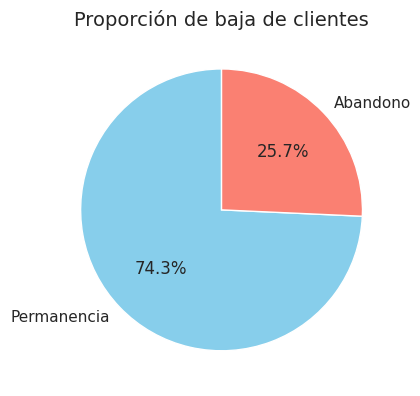

In [215]:
# Gr√°fico de torta
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)

plt.pie(conteo_evasion, labels=['Permanencia', 'Abandono'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Proporci√≥n de baja de clientes', fontsize=14)
plt.savefig('proporcion_evasion.png', dpi=300, bbox_inches='tight')
plt.show()

### **üìà 1. Gr√°fico: Evasi√≥n seg√∫n Permanencia**

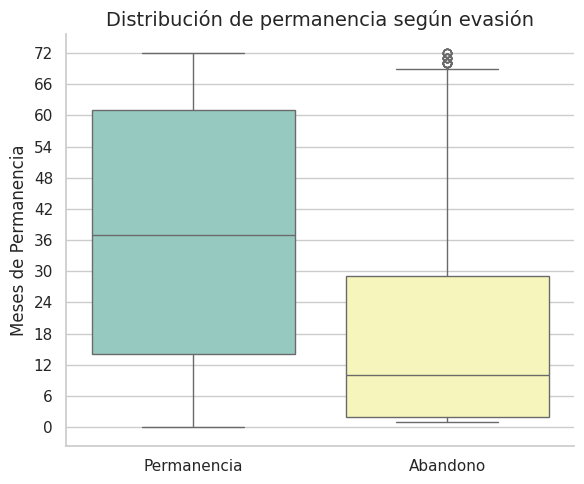

In [216]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_telecom, x='Evasi√≥n', hue='Evasi√≥n', y='Permanencia', palette='Set3', legend=False)
plt.title('Distribuci√≥n de permanencia seg√∫n evasi√≥n', fontsize=14)
plt.xlabel('')
plt.ylabel('Meses de Permanencia')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
plt.yticks(range(0, 73, 6))
plt.tight_layout()
sns.despine(top=True, right=True)
plt.savefig('dist_permanencia.png', dpi=300, bbox_inches='tight')
plt.show()

## **Recuento de evasi√≥n por variables categ√≥ricas**

Ahora, exploraremos c√≥mo se distribuye la evasi√≥n seg√∫n variables categ√≥ricas, como 'G√©nero', 'Tipo Contrato', 'M√©todo de Pago', 'Adulto Mayor', 'Dependiente' entre otras.

Este an√°lisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudar√° a orientar acciones estrat√©gicas.

### üõ†Ô∏è **C√≥digo generalizado para cualquier variable categ√≥rica**

In [217]:
def resumen_evasion_por_categoria(df, columna):
    resumen = df.groupby([columna, 'Evasi√≥n']).size().unstack(fill_value=0)
    resumen.columns = ['Permanencia', 'Abandono']
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=columna, hue='Evasi√≥n', palette='pastel')
    plt.title(f'Evasi√≥n seg√∫n {columna.lower()}', fontsize=14)
    plt.xlabel(columna, fontsize=12)
    plt.ylabel('Cantidad de clientes')
    plt.xlabel('')
    plt.xticks(rotation=0)
    sns.despine(top=True, right=True)
    plt.grid(axis='x', linestyle='')
    plt.legend(title='Estado', labels=['Permanencia', 'Abandono'], loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.savefig(f'evasion_{columna.lower()}.png', dpi=300, bbox_inches='tight')
    plt.show()


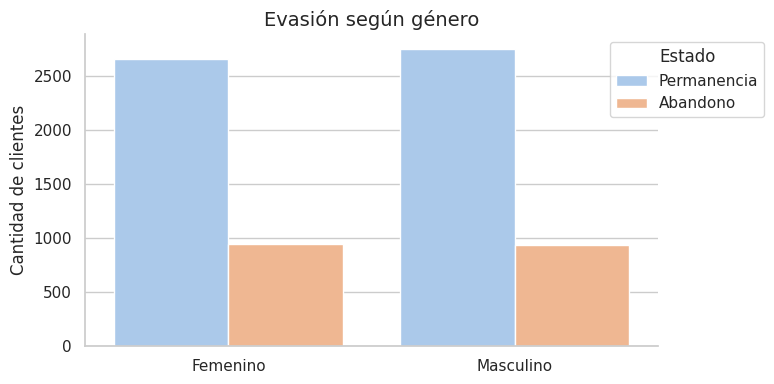

In [218]:
resumen_evasion_por_categoria(df_telecom, 'G√©nero')

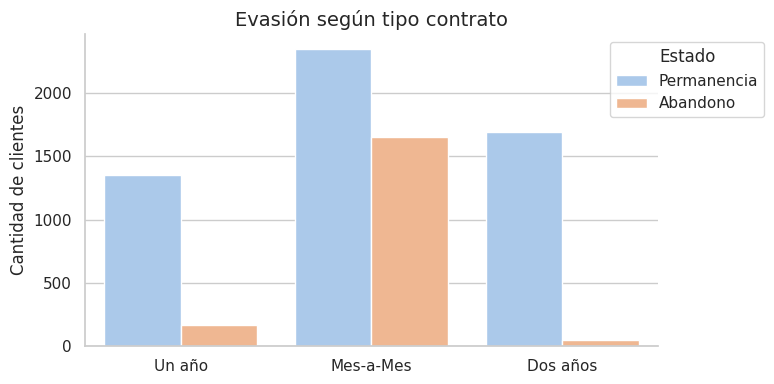

In [219]:
resumen_evasion_por_categoria(df_telecom, 'Tipo Contrato')

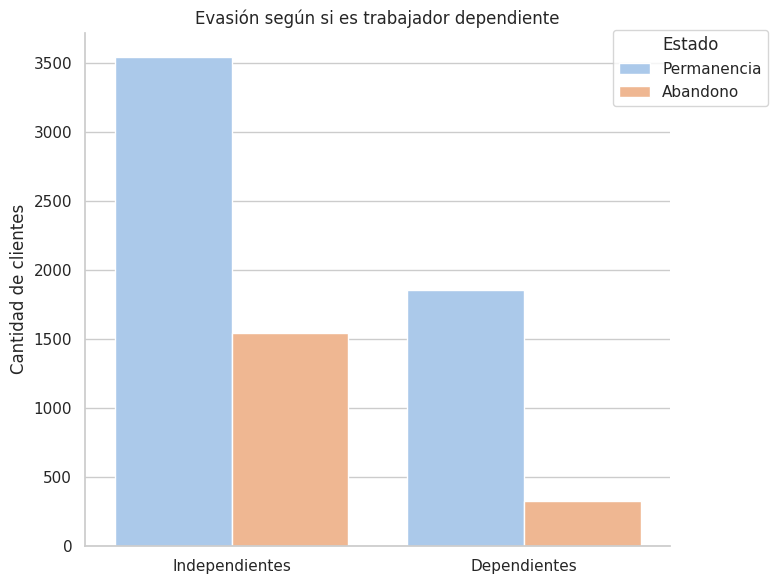

In [220]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_telecom, x='Dependiente', hue='Evasi√≥n', palette='pastel')
plt.title('Evasi√≥n seg√∫n si es trabajador dependiente')
plt.ylabel('Cantidad de clientes')
plt.xlabel('')
plt.legend(labels=['Permanencia', 'Abandono'])
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='')
plt.xticks([0, 1], ['Independientes', 'Dependientes'])
plt.legend(title='Estado', labels=['Permanencia', 'Abandono'], loc='upper right', bbox_to_anchor=(1.18, 1.02))
plt.tight_layout()
plt.savefig('evasion_trabajador_dependiente.png', dpi=300, bbox_inches='tight')

plt.show()

In [221]:
# Crear resumen de evasi√≥n por 'M√©todo de Pago'
resumen_pago = df_telecom.groupby(['M√©todo de Pago', 'Evasi√≥n']).size().unstack(fill_value=0)
resumen_pago.columns = ['Permanecen', 'Se evaden']
resumen_pago['Total'] = resumen_pago.sum(axis=1)
resumen_pago['% Evasi√≥n'] = resumen_pago['Se evaden'] / resumen_pago['Total'] * 100

In [222]:
# Ordenar por porcentaje de evasi√≥n
resumen_ordenado = resumen_pago.sort_values('% Evasi√≥n', ascending=False).reset_index()

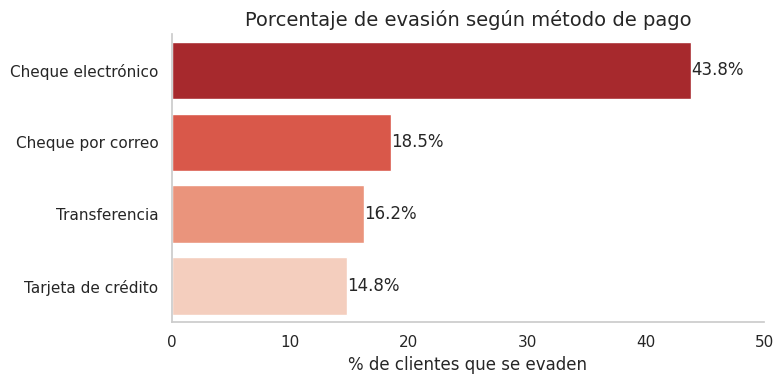

In [223]:
plt.figure(figsize=(8, 4))
sns.barplot(data=resumen_ordenado, y='M√©todo de Pago', x='% Evasi√≥n', hue='M√©todo de Pago', palette='Reds_r')
plt.title('Porcentaje de evasi√≥n seg√∫n m√©todo de pago', fontsize=14)
plt.xlabel('% de clientes que se evaden')
plt.ylabel('')
plt.xlim(0, 50)
sns.despine(top=True, right=True)
plt.grid(axis='x', linestyle='')
for i, j in enumerate(resumen_ordenado['% Evasi√≥n']):
    plt.text(j, i, f'{j:.1f}%', ha='left', va='center')
plt.tight_layout()
plt.savefig('porcentaje_evasion_metodo_pago.png', dpi=300, bbox_inches='tight')
plt.show()

## **Conteo de evasi√≥n por variables num√©ricas**

Analizar variables num√©ricas como 'Cargo Total' en funci√≥n de la evasi√≥n (Evasi√≥n) permite identificar:

- Si los clientes con cargos totales bajos tienden a cancelar.
- Qu√© perfiles econ√≥micos son m√°s propensos a darse de baja.

### üì¶ **Distribuci√≥n de Permanencia seg√∫n evasi√≥n**

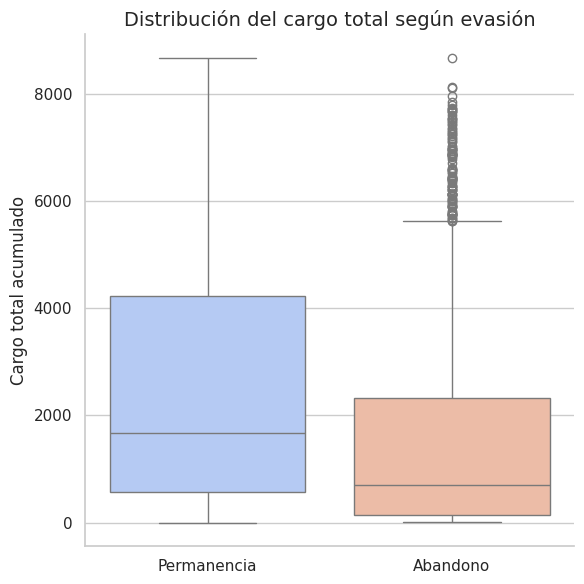

In [224]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_telecom, x='Evasi√≥n', y='Cargo Total', hue='Evasi√≥n', palette='coolwarm', legend=False)
plt.title('Distribuci√≥n del cargo total seg√∫n evasi√≥n', fontsize=14)
plt.xlabel('')
plt.ylabel('Cargo total acumulado')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
sns.despine(top=True, right=True)
plt.tight_layout()
plt.savefig('dist_cargo_total.png', dpi=300, bbox_inches='tight')
plt.show()

# **üìÑ Informe final**

## üìò **Introducci√≥n**

Telecom X, una empresa del sector de telecomunicaciones, enfrenta un desaf√≠o cr√≠tico: una **alta tasa de cancelaci√≥n de servicios por parte de sus clientes**, tambi√©n conocida como evasi√≥n o churn. Este fen√≥meno tiene un impacto directo en los ingresos recurrentes de la compa√±√≠a, eleva los costos de adquisici√≥n de nuevos usuarios y reduce la estabilidad financiera a largo plazo.

Con el objetivo de **entender las causas del abandono de clientes**, se desarroll√≥ un an√°lisis exploratorio de datos utilizando Python y sus principales bibliotecas para ciencia de datos (pandas, numpy, matplotlib, seaborn). Este estudio busca responder preguntas como:

- ¬øQu√© caracter√≠sticas comparten los clientes que se evaden?
- ¬øExisten patrones o comportamientos comunes en t√©rminos de facturaci√≥n, permanencia o perfil del cliente?
- ¬øQu√© segmentos presentan mayor riesgo de cancelaci√≥n?

Al identificar los factores asociados con la evasi√≥n, Telecom X podr√° **dise√±ar estrategias proactivas de retenci√≥n**, mejorar sus servicios y personalizar sus campa√±as de fidelizaci√≥n.

## üßπ **Limpieza y Tratamiento de Datos**

Con el objetivo de preparar los datos para su an√°lisis, se sigui√≥ un proceso de ETL (Extracci√≥n, Transformaci√≥n y Carga) que incluy√≥ la importaci√≥n, exploraci√≥n, normalizaci√≥n, limpieza y estandarizaci√≥n de los datos entregados por Telecom X.

### üîΩ **Extracci√≥n de datos**

Se import√≥ el conjunto de datos en formato JSON desde una fuente en l√≠nea y se carg√≥ en un DataFrame de pandas. Los datos conten√≠an informaci√≥n estructurada en campos anidados tipo diccionario (JSON string) para atributos como datos del cliente, tel√©fono, servicios contratados y detalles de facturaci√≥n.

**Primeros 5 registros del DataFrame**:

|index|customerID|Churn|customer|phone|internet|account|
|---|---|---|---|---|---|---|
|0|0002-ORFBO|No|\{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'\}|\{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 65\.6, 'Total': '593\.3'\}\}|
|1|0003-MKNFE|No|\{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9\}|\{'PhoneService': 'Yes', 'MultipleLines': 'Yes'\}|\{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 59\.9, 'Total': '542\.4'\}\}|
|2|0004-TLHLJ|Yes|\{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'No'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': \{'Monthly': 73\.9, 'Total': '280\.85'\}\}|
|3|0011-IGKFF|Yes|\{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'Yes', 'TechSupport': 'No', 'StreamingTV': 'Yes', 'StreamingMovies': 'Yes'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Electronic check', 'Charges': \{'Monthly': 98\.0, 'Total': '1237\.85'\}\}|
|4|0013-EXCHZ|Yes|\{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3\}|\{'PhoneService': 'Yes', 'MultipleLines': 'No'\}|\{'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'\}|\{'Contract': 'Month-to-month', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': \{'Monthly': 83\.9, 'Total': '267\.4'\}\}|

### üîÑ **Transformaci√≥n inicial**

Se identific√≥ que varias columnas (`'customer', 'phone', 'internet', 'account'`) almacenaban informaci√≥n anidada. Estas columnas fueron normalizadas utilizando `pd.json_normalize()` dentro de un bucle, lo que permiti√≥ descomponerlas en m√∫ltiples columnas con datos at√≥micos.

Luego, se eliminaron las columnas originales anidadas y se conservaron √∫nicamente las columnas desglosadas.

### ‚úÖ **Verificaci√≥n y correcci√≥n de inconsistencias**

Se realiz√≥ una auditor√≠a de calidad de datos que revel√≥:

- La columna `'Charges.Total'` ten√≠a valores vac√≠os y estaba en formato object, por lo que se convirti√≥ a `float64` reemplazando valores nulos por 0.
- La columna `'SeniorCitizen'` se transform√≥ correctamente a tipo booleano (True / False).
- Se descartaron columnas irrelevantes como `'customerID'`.

Adem√°s, se agreg√≥ una nueva variable `'Cargo Diario'`, estimada dividiendo la facturaci√≥n mensual entre 30 d√≠as, para proporcionar un indicador m√°s granular del comportamiento de pago.

### üß™ **Estandarizaci√≥n de valores**

Varias columnas conten√≠an respuestas tipo "Yes" / "No", las cuales se transformaron a valores booleanos (True / False). Esto facilit√≥ el an√°lisis num√©rico y la construcci√≥n de visualizaciones m√°s precisas.

Tambi√©n se tradujeron al espa√±ol los nombres de las columnas y los valores categ√≥ricos para mejorar la comprensi√≥n del an√°lisis y facilitar su interpretaci√≥n por parte del equipo de negocio.

### üßæ **Resultado final**

El *DataFrame* final contiene **7267 registros** con columnas relevantes y limpias, listas para ser utilizadas en el an√°lisis exploratorio. Las variables clave como `'Evasi√≥n'`, `'Permanencia'`, `'Cargo Total'`, `'Tipo Contrato'` y `'M√©todo de Pago'` fueron validadas, transformadas y estandarizadas correctamente.

Adem√°s, el conjunto de datos fue exportado como archivo `.csv` bajo el nombre `Datos_TelecomX.csv`, listo para su uso en procesos posteriores.



**Primeros 5 registros del DataFrame Final**:

|index|Evasi√≥n|G√©nero|Adulto Mayor|Tiene Pareja|Dependiente|Permanencia|Servicio Telef√≥nico|L√≠neas M√∫ltiples|Servicio Internet|Seguridad en L√≠nea|Respaldo en Linea|Protecci√≥n Dispositivo|Soporte T√©cnico|Streaming de TV|Streaming de Pel√≠culas|Tipo Contrato|Facturaci√≥n Electronica|M√©todo de Pago|Cargo Mensual|Cargo Total|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|0|false|Femenino|false|true|true|9|true|false|DSL|false|true|false|true|true|false|Un a√±o|true|Cheque por correo|65\.6|593\.3|
|1|false|Masculino|false|false|false|9|true|true|DSL|false|false|false|false|false|true|Mes-a-Mes|false|Cheque por correo|59\.9|542\.4|
|2|true|Masculino|false|false|false|4|true|false|Fibra √≥ptica|false|false|true|false|false|false|Mes-a-Mes|true|Cheque electr√≥nico|73\.9|280\.85|
|3|true|Masculino|true|true|false|13|true|false|Fibra √≥ptica|false|true|true|false|true|true|Mes-a-Mes|true|Cheque electr√≥nico|98\.0|1237\.85|
|4|true|Femenino|true|true|false|3|true|false|Fibra √≥ptica|false|false|false|true|true|false|Mes-a-Mes|true|Cheque por correo|83\.9|267\.4|

## üìä **An√°lisis Exploratorio de Datos (EDA)**

Con el conjunto de datos limpio y estandarizado, se procedi√≥ a realizar un an√°lisis exploratorio para comprender mejor los patrones de comportamiento de los clientes, especialmente en relaci√≥n con la evasi√≥n del servicio. Se utilizaron visualizaciones para detectar tendencias, relaciones y caracter√≠sticas clave asociadas con los clientes que abandonan Telecom X.

### üìâ **Distribuci√≥n general de evasi√≥n**

Se analizaron las proporciones generales de clientes que permanecen y los que se evaden.

- **Gr√°fico de barras**: muestra el n√∫mero absoluto de clientes en cada categor√≠a (Permanece vs Abandona).

<img src="https://drive.google.com/uc?id=1KzJ45XEXdqrTqbMjsDbDaSIsen38l8TP&" alt="Descripci√≥n de la imagen" width="400">

- **Gr√°fico de torta**: permite observar la proporci√≥n relativa de evasi√≥n.

<img src="https://drive.google.com/uc?id=1tkup42KP9QrwmLVvuWxtx_eGBRZYsiCZ" alt="Descripci√≥n de la imagen" width="400">

**Resultado**: Aproximadamente 25.7% de los clientes han abandonado el servicio, mientras que 74.3% se mantienen activos.

### üì¶ **Evasi√≥n seg√∫n permanencia**

Se utiliz√≥ un boxplot para evaluar la relaci√≥n entre el tiempo de permanencia (en meses) y la evasi√≥n.

<img src="https://drive.google.com/uc?id=1ccmj5KHrV9QMoBvEH2w14vQKVyeE2A7W" alt="Descripci√≥n de la imagen" width="500">

**Se observ√≥ que**:

- Los clientes que abandonan tienden a tener menor tiempo de permanencia.
- Los clientes con contratos m√°s prolongados tienden a mantenerse, lo que sugiere una correlaci√≥n entre fidelidad y permanencia.

### üßë‚Äçü§ù‚Äçüßë **Evasi√≥n seg√∫n variables categ√≥ricas**

Se analizaron diversas variables categ√≥ricas para identificar patrones en la evasi√≥n. Se utilizaron gr√°ficos de barras agrupadas para comparar las tasas de evasi√≥n en distintas categor√≠as:

**G√©nero**: No se evidencian diferencias significativas entre hombres y mujeres.

<img src="https://drive.google.com/uc?id=12sE2RH6eYO9n_twPPrdCIPy71rsOzbPB" alt="Descripci√≥n de la imagen" width="700">

**Tipo de contrato**: Los clientes con contrato mensual (Mes-a-Mes) presentan una tasa mucho mayor de evasi√≥n, mientras que los contratos de uno o dos a√±os se asocian con una mayor retenci√≥n.

<img src="https://drive.google.com/uc?id=1Hr8UcbAmzj94gjrmFV-b5325iHeMKcO0" alt="Descripci√≥n de la imagen" width="700">

**Dependencia laboral**: Los clientes independientes (sin dependientes) tienen una mayor probabilidad de evasi√≥n.

<img src="https://drive.google.com/uc?id=1JfSbEoz-fyHGeA-8n1IglAIIRa6NtiKq" alt="Descripci√≥n de la imagen" width="700">

### üí≥ **Evasi√≥n seg√∫n m√©todo de pago**

Dado que hay varias categor√≠as de m√©todos de pago, se utiliz√≥ un gr√°fico de barras horizontales para observar mejor la variaci√≥n:

<img src="https://drive.google.com/uc?id=10Hrv6h9ogFwVl6p2KILJWqzYVXz51HcW" alt="Descripci√≥n de la imagen" width="800">

- Los clientes que utilizan cheque electr√≥nico tienen la mayor tasa de evasi√≥n.
- En contraste, quienes usan tarjeta de cr√©dito autom√°tica presentan una menor probabilidad de abandonar el servicio.



Esta diferencia sugiere que los m√©todos de pago autom√°ticos podr√≠an estar relacionados con una mayor fidelidad.

### üíµ **Evasi√≥n seg√∫n variables num√©ricas**

Finalmente, se explor√≥ la variable Cargo Total mediante un boxplot:

<img src="https://drive.google.com/uc?id=1IMJqPAldJt6A4ilHtNdKnxMaSVVsGx-3" alt="Descripci√≥n de la imagen" width="600">

Los clientes que abandonan el servicio tienen, en general, menores cargos acumulados, lo que concuerda con la observaci√≥n previa de menor tiempo de permanencia.

## ‚úÖ Conclusiones e Insights

El an√°lisis realizado sobre el comportamiento de los clientes de Telecom X revel√≥ hallazgos clave que explican parte del problema de evasi√≥n. A continuaci√≥n, se destacan los principales:

1. **Alta tasa de evasi√≥n**: Aproximadamente **1 de cada 4 clientes** abandona el servicio, lo que representa un desaf√≠o significativo para la empresa.
1. **Menor permanencia, mayor evasi√≥n**: Los clientes que cancelan tienden a haber estado suscritos por menos tiempo. Existe una clara correlaci√≥n entre **baja permanencia y alta probabilidad de evasi√≥n**.
1. **Contratos mensuales est√°n m√°s expuestos**: Los clientes con contratos de tipo "**Mes-a-Mes**" presentan una **tasa de evasi√≥n sustancialmente mayor**, comparado con aquellos con contratos anuales o bianuales.
1. **M√©todos de pago asociados a abandono**: Se identific√≥ que clientes que utilizan **cheque electr√≥nico o por correo** tienen una tasa m√°s alta de evasi√≥n. En contraste, los m√©todos autom√°ticos (tarjeta o transferencia) est√°n asociados con mayor retenci√≥n.
1. **Perfil demogr√°fico y servicios**: No se encontraron diferencias notables en evasi√≥n por g√©nero, pero s√≠ por **situaci√≥n familiar**: quienes no **tienen pareja o dependientes** tienden a cancelar con mayor frecuencia. Tambi√©n se observ√≥ que ciertos servicios opcionales como **soporte t√©cnico** o **respaldo en l√≠nea** pueden influir positivamente en la retenci√≥n.

## üéØ **Recomendaciones Estrat√©gicas**

Basado en los patrones detectados en los datos, se proponen las siguientes acciones para reducir la evasi√≥n de clientes:

1. **Fomentar contratos de largo plazo**
    - Implementar incentivos o beneficios especiales para quienes opten por contratos anuales o bianuales, ya que estos est√°n claramente asociados con menor evasi√≥n.
1. **Promover m√©todos de pago autom√°ticos**
    - Otorgar descuentos o recompensas a clientes que se cambien a **tarjeta de cr√©dito** o **transferencia autom√°tica**.
    - Simplificar el proceso de migraci√≥n de m√©todo de pago.
1. **Detectar clientes en riesgo temprano**
    - Crear alertas para clientes con menos de 6 meses de permanencia o con cargos bajos acumulados, ya que estos perfiles son m√°s propensos a abandonar.
1. **Optimizar servicios complementarios**
    - Aumentar la visibilidad y valor percibido de servicios como **respaldo en l√≠nea**, **soporte t√©cnico** y **protecci√≥n de dispositivos**, que se relacionan con mayor retenci√≥n.
1. **Segmentar y personalizar la comunicaci√≥n**
    - Usar los hallazgos del perfil de evasi√≥n para dise√±ar campa√±as dirigidas seg√∫n tipo de cliente, contrato y m√©todo de pago.
1. **Explorar encuestas de salida**
    - Implementar encuestas automatizadas a clientes que cancelan para identificar razones espec√≠ficas y validar los patrones observados en los datos.

# üìå **¬°Extra! An√°lisis de correlaci√≥n entre variables**

## üìä **1. Matriz de correlaci√≥n**

Calculamos la matriz de correlaci√≥n de las variables num√©ricas y booleanas convertidas a `int`, ya que `pandas.DataFrame.corr()` funciona √∫nicamente con valores num√©ricos.

In [225]:
# Convertir columnas booleanas a int para calcular la correlaci√≥n
df_corr = df_telecom.copy()
df_corr = df_corr.astype({col: int for col in df_corr.select_dtypes('bool').columns})

In [226]:
# Calcular la matriz de correlaci√≥n
correlaciones = df_corr.corr(numeric_only=True)

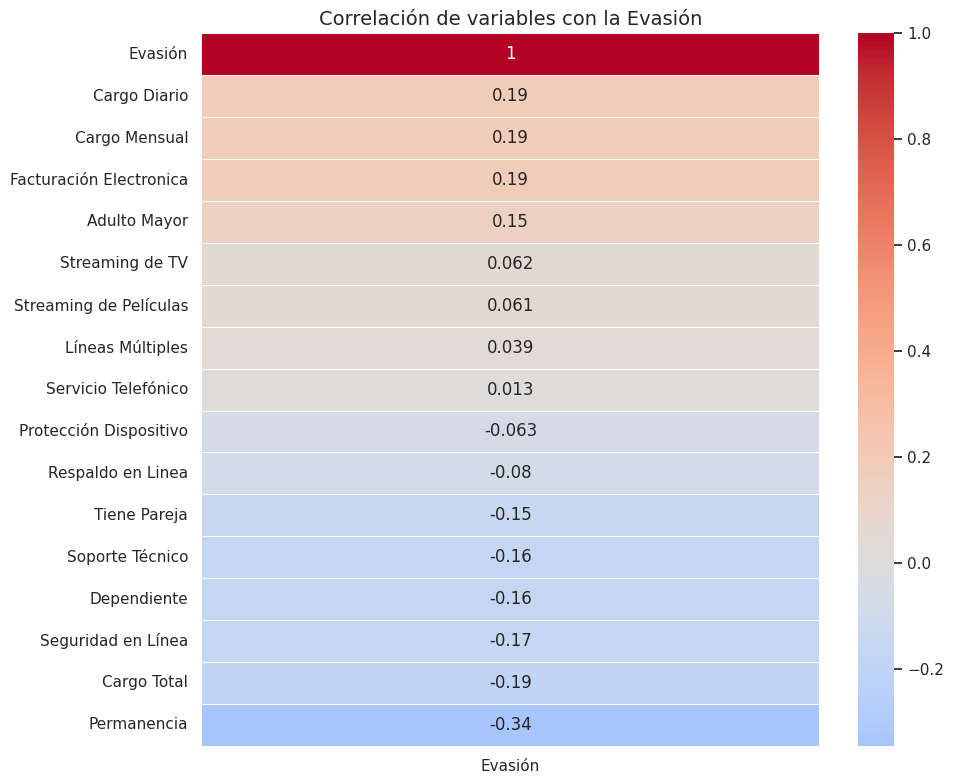

In [227]:
# Visualizar correlaci√≥n con 'Evasi√≥n'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones[['Evasi√≥n']].sort_values(by='Evasi√≥n', ascending=False),
            annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlaci√≥n de variables con la Evasi√≥n', fontsize=14)
plt.tight_layout()
plt.show()

## üîç **Insights observados**

- `Tipo Contrato (Mes-a-Mes)` y `M√©todo de Pago (Cheque electr√≥nico)` tienen fuerte correlaci√≥n positiva con la evasi√≥n.
- `Permanencia`, `Cargo Total` y `Cargo Diario` muestran correlaci√≥n negativa, indicando que clientes con m√°s tiempo o mayor inversi√≥n suelen permanecer m√°s.
- Servicios como `Soporte T√©cnico`, `Protecci√≥n Dispositivo` y `Seguridad en L√≠nea` tienen ligera correlaci√≥n negativa, sugiriendo una leve relaci√≥n entre acceso a estos servicios y menor evasi√≥n.

## üî¢ **2. Relaci√≥n entre n√∫mero de servicios contratados y evasi√≥n**

Calculamos una nueva variable: el n√∫mero de servicios digitales contratados por cliente.

In [228]:
# Lista de servicios booleanos
servicios = [
    'Servicio Telef√≥nico', 'L√≠neas M√∫ltiples', 'Seguridad en L√≠nea',
    'Respaldo en Linea', 'Protecci√≥n Dispositivo', 'Soporte T√©cnico',
    'Streaming de TV', 'Streaming de Pel√≠culas'
]

In [229]:
# Crear columna con el conteo de servicios contratados
df_telecom['Servicios Contratados'] = df_telecom[servicios].sum(axis=1)

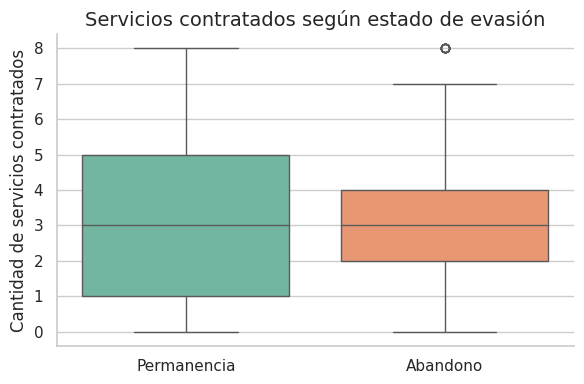

In [230]:
# Boxplot de servicios vs evasi√≥n
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_telecom, x='Evasi√≥n', y='Servicios Contratados', hue='Evasi√≥n', palette='Set2', legend=False)
plt.title('Servicios contratados seg√∫n estado de evasi√≥n', fontsize=14)
plt.xlabel('')
plt.ylabel('Cantidad de servicios contratados')
plt.xticks([0, 1], ['Permanencia', 'Abandono'])
sns.despine()
plt.tight_layout()
plt.show()

## ‚úÖ **Conclusi√≥n del an√°lisis de correlaci√≥n**

- Cuantos menos servicios tiene un cliente, **es m√°s probable que abandone la compa√±√≠a**.
- Las **cuentas diarias m√°s bajas** tambi√©n muestran mayor relaci√≥n con evasi√≥n.
- Este tipo de an√°lisis es especialmente √∫til como **base para modelos de machine learning**, ya que permite seleccionar las variables m√°s influyentes en la predicci√≥n de abandono.